# CHURN PREDICTION



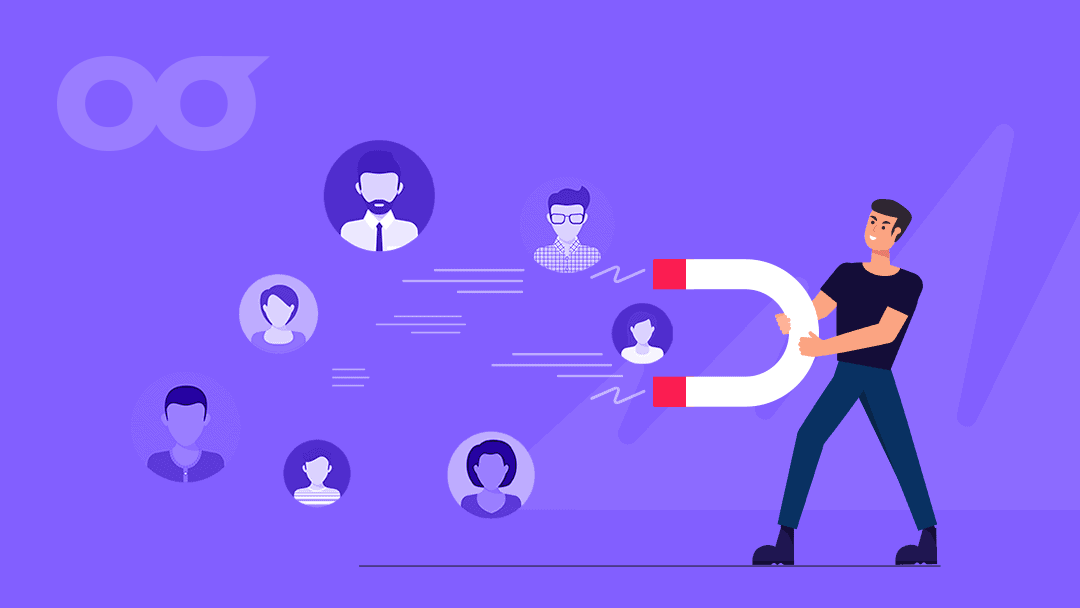


# Problem Statement 

Customer churn rate is a measure that quantifies the number of customers who leave a business during a specified period of time. Identifying and predicting churn is the necessary first step to keeping these customers and offering better products and services.

Our goal is to predict churn for a website based on the data features provided. Customers will either churn (1) or not churn (0). We want to identify customers who are at risk of churning so that we can offer them special deals on membership to retain them.





# The Attributes Include 

1. Age: The age of the customer.
2. Gender: The gender of the customer.
3. Security number: A unique security number that is used to identify a person.
4. Region category: The region that the customer belongs to.
6. Membership category: The category of the membership that the customer is using.
7. Joining date: The date when the customer became a member.
8. Joined through referral: Whether the customer joined using any referral code or ID.
9. Referral ID: A referral ID.
10. Preferred offer types: The type of offer that the customer prefers.
11. Medium of operation: The medium of operation that the customer uses for transactions.
12. Internet option: The type of internet service that the customer uses.
13. Last visit time: The last time the customer visited the website.
14. Days since last login: The number of days since the customer last logged into the website.
15. Average time spent: The average time spent by the customer on the website.
16. Average transaction value: The average transaction value of the customer.
17. Average frequency login days: The number of times a customer has logged in to the website.
18. Points in wallet: The points awarded to a customer on each transaction.
19. Used special discount: Whether the customer uses special discounts offered.
20. Offer application preference: Whether the customer prefers offers.
21. Past complaint: Whether the customer has raised any complaints.
22. Complaint status: Whether the complaints raised by the customer was resolved.
23. Feedback: The feedback provided by the customer.
24. Churn risk score: A score that indicates whether the customer is likely to churn (1) or not churn (0).

# Importing Libraries

In [1]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')


In [2]:
# Importing Pandas and NumPy
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('churn.csv', index_col=0)
df.head()

,age,gender,security_no,region_category,membership_category,joining_date,joined_through_referral,referral_id,preferred_offer_types,medium_of_operation,...,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,18,F,XW0DQ7H,Village,Platinum Membership,2017-08-17,No,xxxxxxxx,Gift Vouchers/Coupons,?,...,300.63,53005.25,17.0,781.75,Yes,Yes,No,Not Applicable,Products always in Stock,0
1,32,F,5K0N3X1,City,Premium Membership,2017-08-28,?,CID21329,Gift Vouchers/Coupons,Desktop,...,306.34,12838.38,10.0,NaN,Yes,No,Yes,Solved,Quality Customer Care,0
2,44,F,1F2TCL3,Town,No Membership,2016-11-11,Yes,CID12313,Gift Vouchers/Coupons,Desktop,...,516.16,21027.00,22.0,500.69,No,Yes,Yes,Solved in Follow-up,Poor Website,1
3,37,M,VJGJ33N,City,No Membership,2016-10-29,Yes,CID3793,Gift Vouchers/Coupons,Desktop,...,53.27,25239.56,6.0,567.66,No,Yes,Yes,Unsolved,Poor Website,1
4,31,F,SVZXCWB,City,No Membership,2017-09-12,No,xxxxxxxx,Credit/Debit Card Offers,Smartphone,...,113.13,24483.66,16.0,663.06,No,Yes,Yes,Solved,Poor Website,1


# Inspecting the Dataframe

#### There are 17 categorical variables and 6 numerical variables

In [4]:
# Let's see the head of our dataset - Top 5 rows
df.head()

,age,gender,security_no,region_category,membership_category,joining_date,joined_through_referral,referral_id,preferred_offer_types,medium_of_operation,...,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,18,F,XW0DQ7H,Village,Platinum Membership,2017-08-17,No,xxxxxxxx,Gift Vouchers/Coupons,?,...,300.63,53005.25,17.0,781.75,Yes,Yes,No,Not Applicable,Products always in Stock,0
1,32,F,5K0N3X1,City,Premium Membership,2017-08-28,?,CID21329,Gift Vouchers/Coupons,Desktop,...,306.34,12838.38,10.0,NaN,Yes,No,Yes,Solved,Quality Customer Care,0
2,44,F,1F2TCL3,Town,No Membership,2016-11-11,Yes,CID12313,Gift Vouchers/Coupons,Desktop,...,516.16,21027.00,22.0,500.69,No,Yes,Yes,Solved in Follow-up,Poor Website,1
3,37,M,VJGJ33N,City,No Membership,2016-10-29,Yes,CID3793,Gift Vouchers/Coupons,Desktop,...,53.27,25239.56,6.0,567.66,No,Yes,Yes,Unsolved,Poor Website,1
4,31,F,SVZXCWB,City,No Membership,2017-09-12,No,xxxxxxxx,Credit/Debit Card Offers,Smartphone,...,113.13,24483.66,16.0,663.06,No,Yes,Yes,Solved,Poor Website,1


In [5]:
# Let's see the tail of our dataset - Last 5 rows 
df.tail()

,age,gender,security_no,region_category,membership_category,joining_date,joined_through_referral,referral_id,preferred_offer_types,medium_of_operation,...,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
36987,46,F,6F51HFO,NaN,Basic Membership,2017-09-21,No,xxxxxxxx,Credit/Debit Card Offers,Desktop,...,-650.682759,27277.68,6.0,639.510000,No,Yes,Yes,No Information Available,No reason specified,1
36988,29,F,21KSM8Y,Town,Basic Membership,2016-06-27,No,xxxxxxxx,Without Offers,Smartphone,...,-638.123421,11069.71,28.0,527.990000,Yes,No,No,Not Applicable,Poor Customer Service,1
36989,23,F,XK1IM9H,NaN,Basic Membership,2016-09-11,Yes,CID3838,Gift Vouchers/Coupons,Desktop,...,154.940000,38127.56,Error,680.470000,No,Yes,Yes,Unsolved,Poor Website,1
36990,53,M,K6VTP1Z,Village,Platinum Membership,2017-06-15,No,xxxxxxxx,Gift Vouchers/Coupons,Smartphone,...,482.610000,2378.86,20.0,197.264414,Yes,Yes,No,Not Applicable,No reason specified,0
36991,35,M,LBX0GLR,Town,Silver Membership,2015-10-23,No,xxxxxxxx,Gift Vouchers/Coupons,Desktop,...,79.180000,2189.68,Error,719.970000,Yes,No,No,Not Applicable,Quality Customer Care,0


In [6]:
# Let's check the dimensions of the dataframe
df.shape

(36992, 23)

In [7]:
# let's look at the statistical aspects of the dataframe
df.describe()

,age,days_since_last_login,avg_time_spent,avg_transaction_value,points_in_wallet,churn_risk_score
count,36992.000000,36992.000000,36992.000000,36992.000000,33549.000000,36992.000000
mean,37.118161,-41.915576,243.472334,29271.194003,686.882199,0.540982
std,15.867412,228.819900,398.289149,19444.806226,194.063624,0.498324
min,10.000000,-999.000000,-2814.109110,800.460000,-760.661236,0.000000
25%,23.000000,8.000000,60.102500,14177.540000,616.150000,0.000000
50%,37.000000,12.000000,161.765000,27554.485000,697.620000,1.000000
75%,51.000000,16.000000,356.515000,40855.110000,763.950000,1.000000
max,64.000000,26.000000,3235.578521,99914.050000,2069.069761,1.000000


1)Average age of customers who is likely to exit is 37
2)On average customers have around 680 point in wallet
3)Maximum no. of days since a customer logged in is 26

In [8]:
df.describe(include='object')

,gender,security_no,region_category,membership_category,joining_date,joined_through_referral,referral_id,preferred_offer_types,medium_of_operation,internet_option,last_visit_time,avg_frequency_login_days,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback
count,36992,36992,31564,36992,36992,36992,36992,36704,36992,36992,36992,36992,36992,36992,36992,36992,36992
unique,3,36992,3,6,1096,3,11359,3,4,3,30101,1654,2,2,2,5,9
top,F,XW0DQ7H,Town,Basic Membership,2015-06-02,No,xxxxxxxx,Gift Vouchers/Coupons,Desktop,Wi-Fi,07:56:41,Error,Yes,Yes,No,Not Applicable,Poor Product Quality
freq,18490,1,14128,7724,55,15839,17846,12349,13913,12413,6,3522,20342,20440,18602,18602,6350


In [9]:
#1)Mostly customers are Females belongs to Town
#2)ost customers uses Desktop to access website over wi-fi
#3)Most of the customers have Basic Membership of the service

In [10]:
# Let's see the data type of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36992 entries, 0 to 36991
Data columns (total 23 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   age                           36992 non-null  int64  
 1   gender                        36992 non-null  object 
 2   security_no                   36992 non-null  object 
 3   region_category               31564 non-null  object 
 4   membership_category           36992 non-null  object 
 5   joining_date                  36992 non-null  object 
 6   joined_through_referral       36992 non-null  object 
 7   referral_id                   36992 non-null  object 
 8   preferred_offer_types         36704 non-null  object 
 9   medium_of_operation           36992 non-null  object 
 10  internet_option               36992 non-null  object 
 11  last_visit_time               36992 non-null  object 
 12  days_since_last_login         36992 non-null  int64  
 13  a

In [11]:
is_missing = df.isnull()
df.isnull().sum()

age                                0
gender                             0
security_no                        0
region_category                 5428
membership_category                0
joining_date                       0
joined_through_referral            0
referral_id                        0
preferred_offer_types            288
medium_of_operation                0
internet_option                    0
last_visit_time                    0
days_since_last_login              0
avg_time_spent                     0
avg_transaction_value              0
avg_frequency_login_days           0
points_in_wallet                3443
used_special_discount              0
offer_application_preference       0
past_complaint                     0
complaint_status                   0
feedback                           0
churn_risk_score                   0
dtype: int64

In [12]:
df= df.drop(['referral_id','last_visit_time','security_no','joining_date','joined_through_referral','medium_of_operation','internet_option','avg_frequency_login_days'], axis=1)

In [13]:

df.shape

(36992, 15)

In [14]:
for column in df.columns:
    value_counts = df[column].value_counts()
    print(f"Value counts for column '{column}':\n{value_counts}\n")

Value counts for column 'age':
33    720
42    716
16    716
38    714
30    711
61    709
60    704
57    704
41    699
59    696
55    695
28    694
34    692
47    691
21    689
32    685
17    683
56    682
29    681
48    680
45    680
46    679
58    678
62    677
22    677
26    675
53    675
52    672
64    672
10    670
14    670
49    669
23    669
36    668
44    661
12    661
19    660
51    660
27    659
43    657
63    656
35    656
50    656
11    654
13    654
37    653
15    649
24    645
39    642
20    641
31    636
25    635
18    629
40    628
54    608
Name: age, dtype: int64

Value counts for column 'gender':
F          18490
M          18443
Unknown       59
Name: gender, dtype: int64

Value counts for column 'region_category':
Town       14128
City       12737
Village     4699
Name: region_category, dtype: int64

Value counts for column 'membership_category':
Basic Membership       7724
No Membership          7692
Gold Membership        6795
Silver Membership  

In [15]:
df.gender.mode()

0    F
Name: gender, dtype: object

In [16]:
df['gender'].replace('Unknown','F',inplace=True)

In [17]:
categorical_columns = ['region_category', 'preferred_offer_types']
for column in categorical_columns:
    df[column].fillna(df[column].mode()[0], inplace=True)

In [18]:
df.isnull().sum()

age                                0
gender                             0
region_category                    0
membership_category                0
preferred_offer_types              0
days_since_last_login              0
avg_time_spent                     0
avg_transaction_value              0
points_in_wallet                3443
used_special_discount              0
offer_application_preference       0
past_complaint                     0
complaint_status                   0
feedback                           0
churn_risk_score                   0
dtype: int64

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36992 entries, 0 to 36991
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   age                           36992 non-null  int64  
 1   gender                        36992 non-null  object 
 2   region_category               36992 non-null  object 
 3   membership_category           36992 non-null  object 
 4   preferred_offer_types         36992 non-null  object 
 5   days_since_last_login         36992 non-null  int64  
 6   avg_time_spent                36992 non-null  float64
 7   avg_transaction_value         36992 non-null  float64
 8   points_in_wallet              33549 non-null  float64
 9   used_special_discount         36992 non-null  object 
 10  offer_application_preference  36992 non-null  object 
 11  past_complaint                36992 non-null  object 
 12  complaint_status              36992 non-null  object 
 13  f

In [20]:
df.duplicated().sum()

0

## Data Visualization

In [21]:
# Importing matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

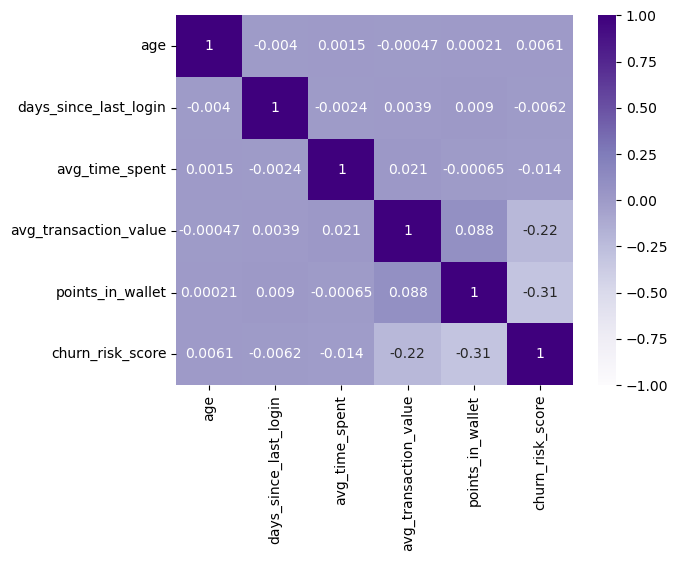

In [22]:
 
sns.heatmap(df.corr(), vmax=1, vmin=-1,cmap='Purples', annot=True)
plt.show()

In [23]:
#There isn't high correlation between independent features and customer chrun
#Maximum -ve correlation between point in wallet and customer chrun is -0.31 
# second max -ve correlation is avg transaction value

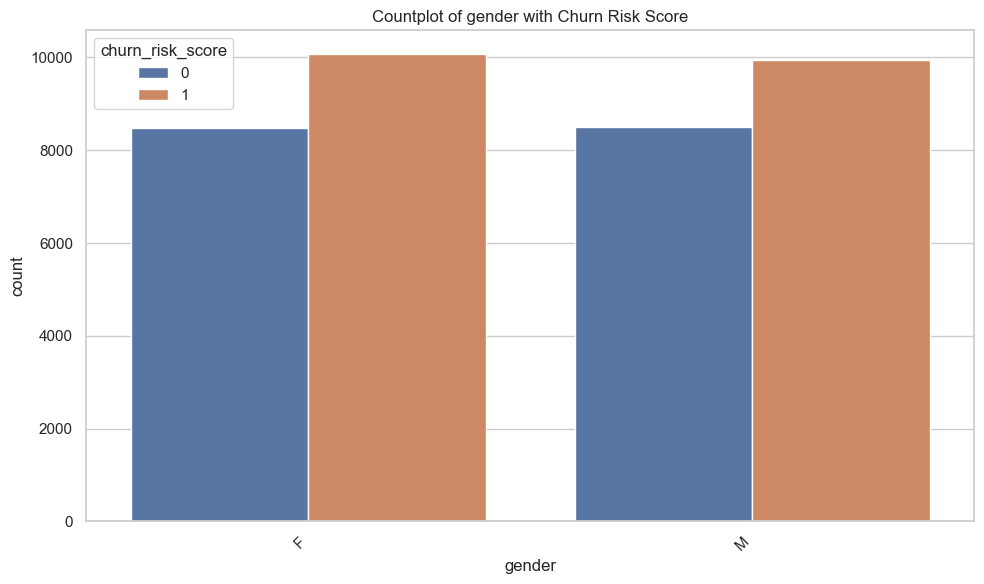

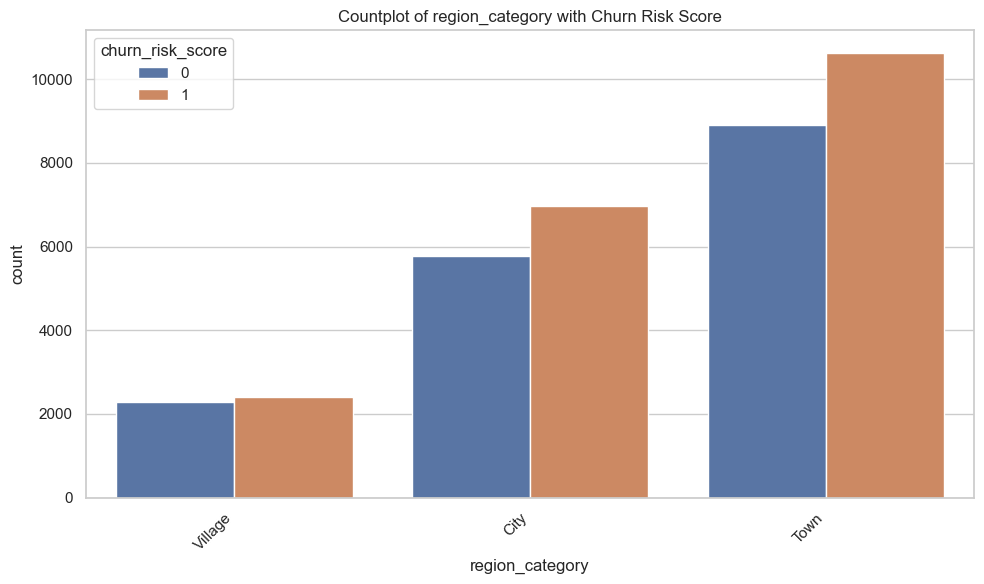

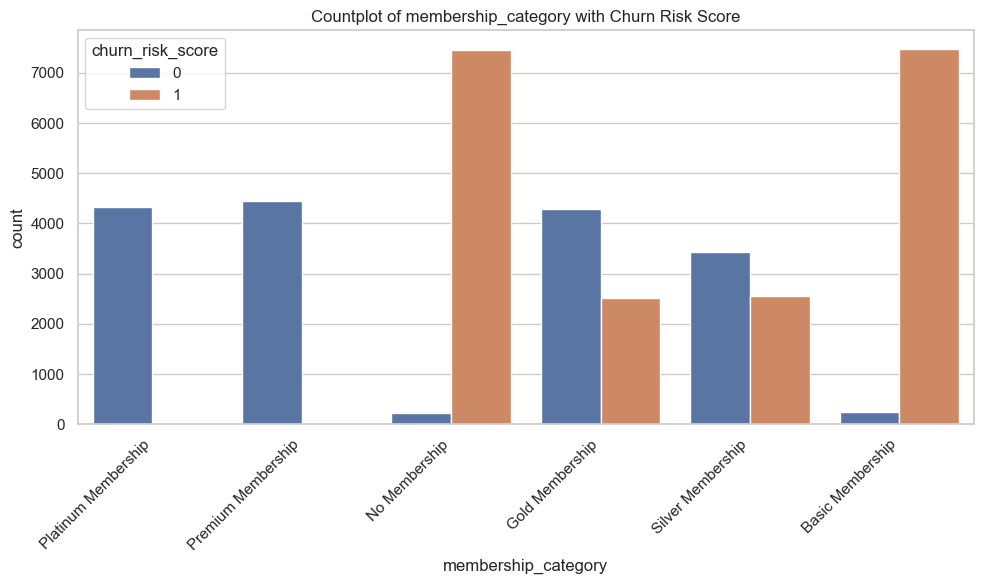

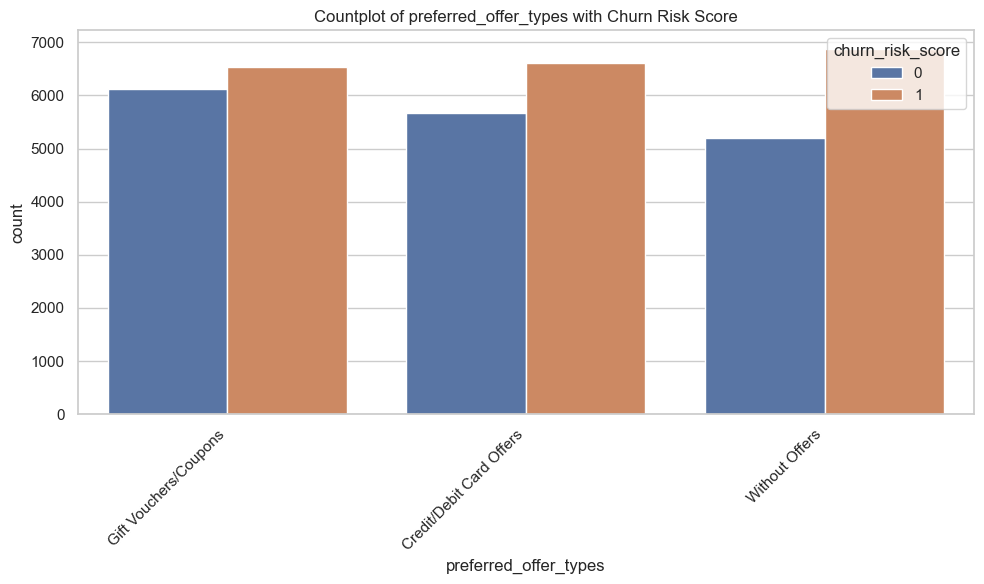

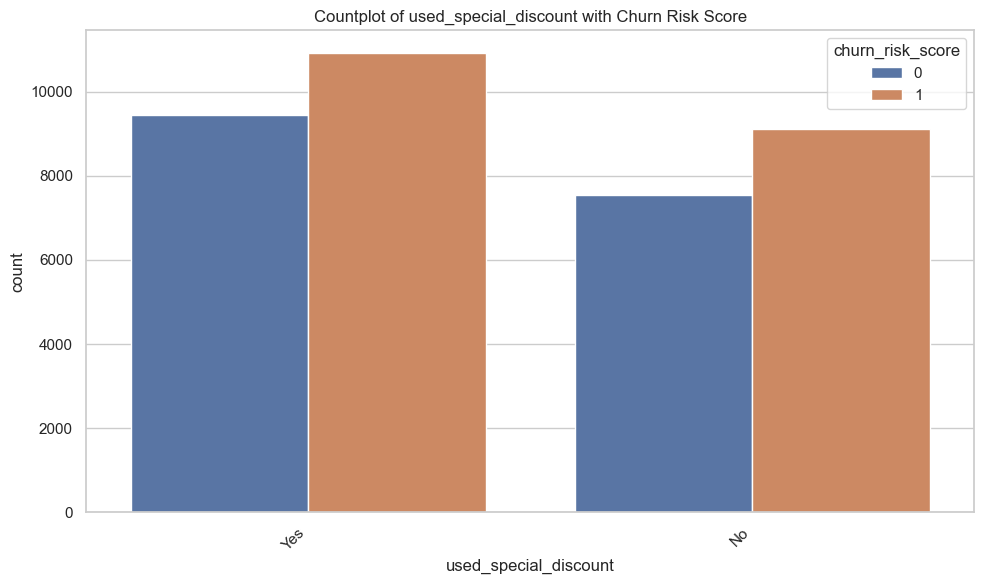

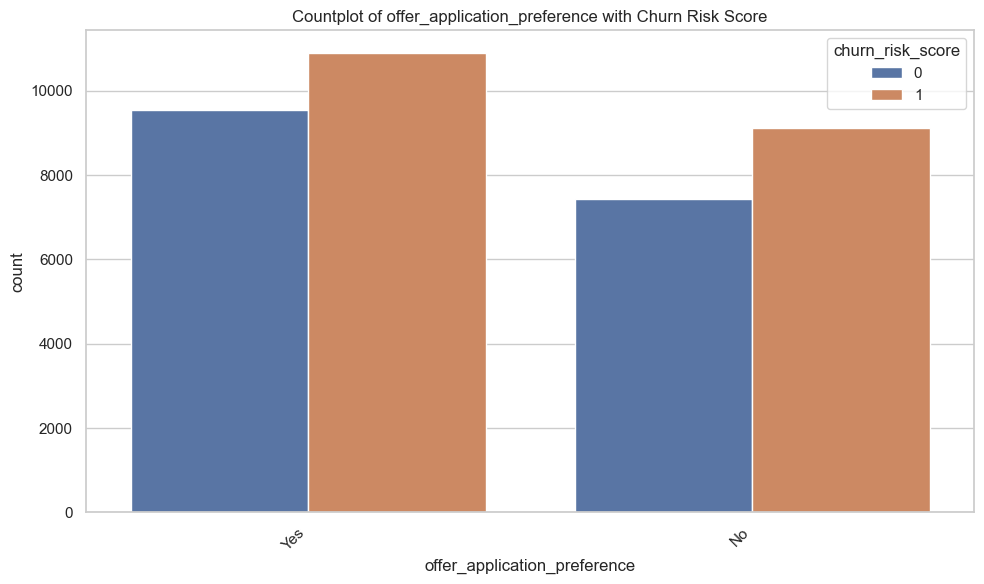

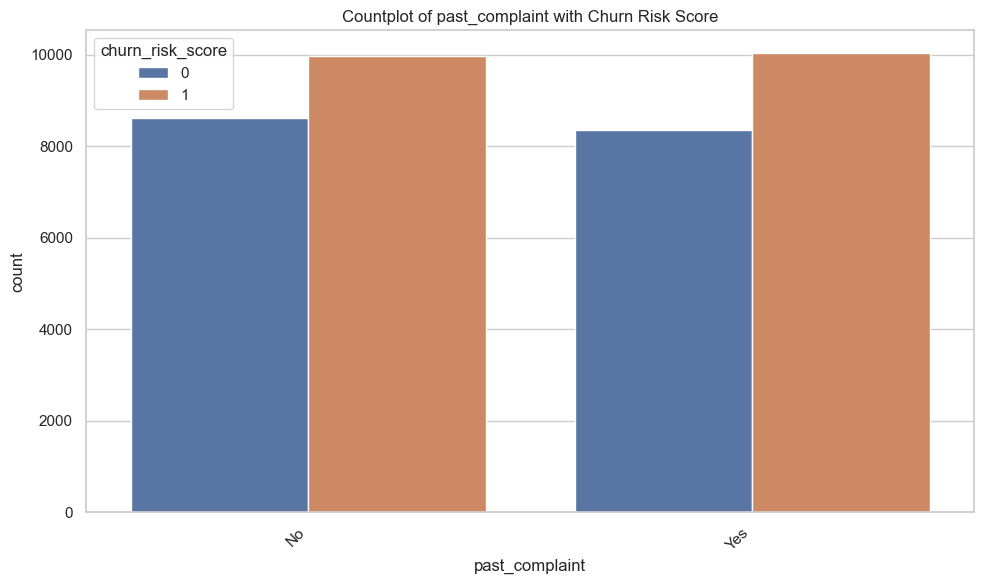

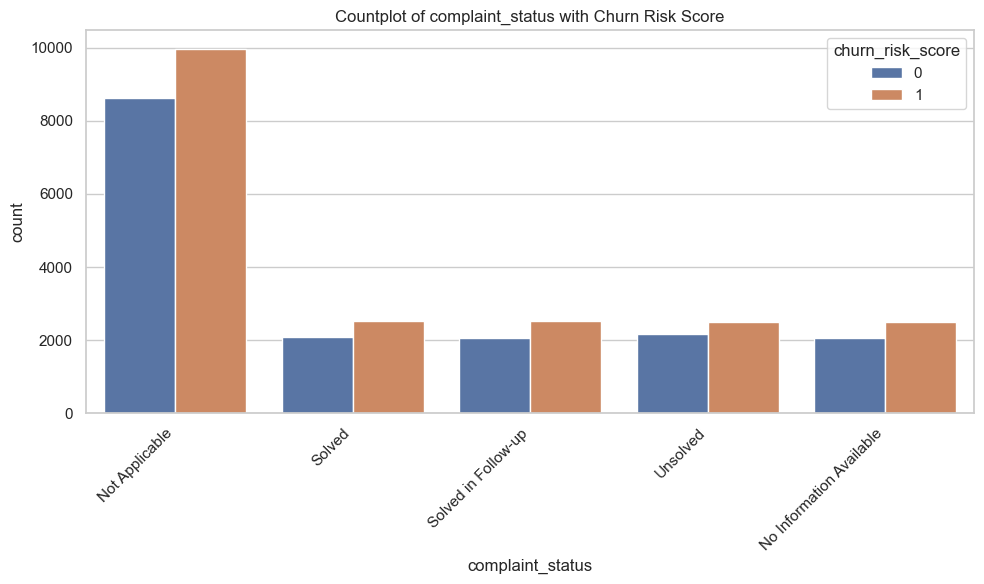

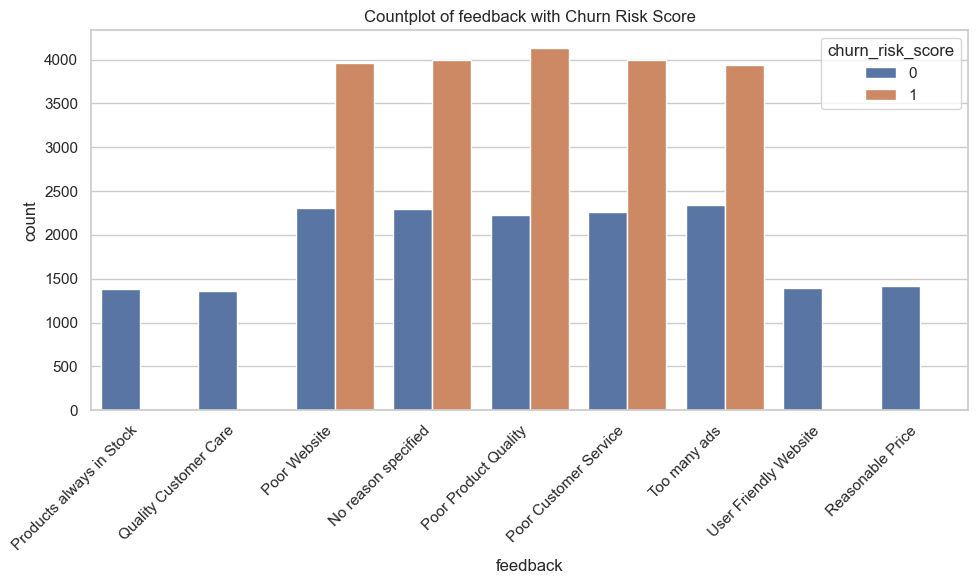

In [24]:
# Shows the Distribution of churn_risk with respect to other variables

categorical = ['gender', 'region_category', 'membership_category','preferred_offer_types','used_special_discount','offer_application_preference', 'past_complaint', 'complaint_status', 'feedback']

for i in categorical:
    sns.set(style="whitegrid")  # Set the style of the plot
    plt.figure(figsize=(10, 6))  # Set the figure size
    ax = sns.countplot(x=df[i], data=df, hue=df['churn_risk_score'])
    
    # Rotate and align x-axis labels for better readability
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
    
    plt.title(f'Countplot of {i} with Churn Risk Score')
    plt.tight_layout()
    plt.show()


In [25]:
#1 As we can see both genders, Male and Female are equally distributed and there is some noise which will be handled in Section 5.1.2
#2 Most of the customers are from town region while least number of customer belongs to village whcih is ~4600.
#3 No membership and Basic category are leading one in membership_category while premium & platinum are least subscribed which is around ~4300+
#4 Most of them have used special discount
#5 Most of the customers has given negative feedback about the service such as poor website, poor customer service etc.

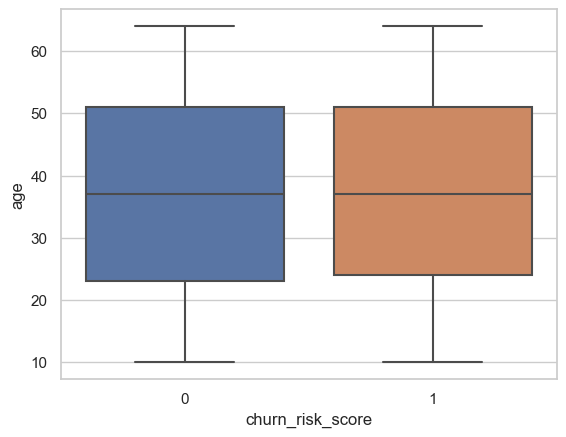

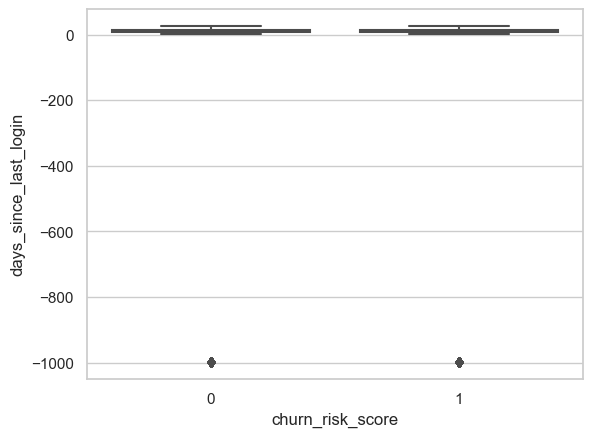

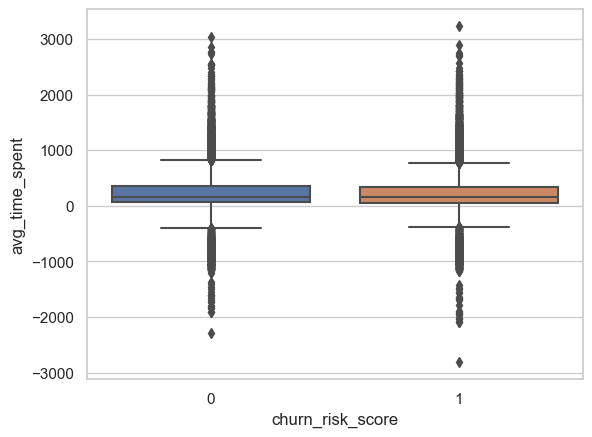

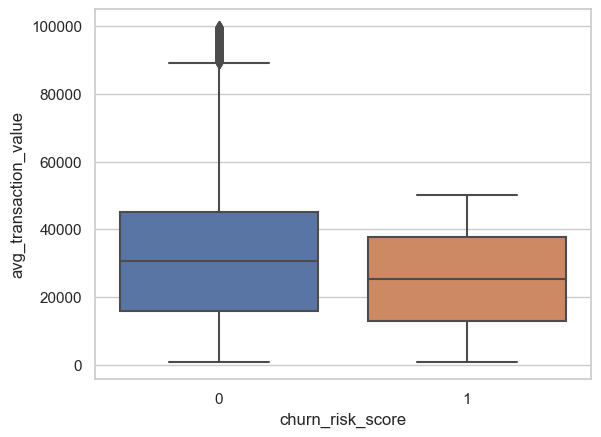

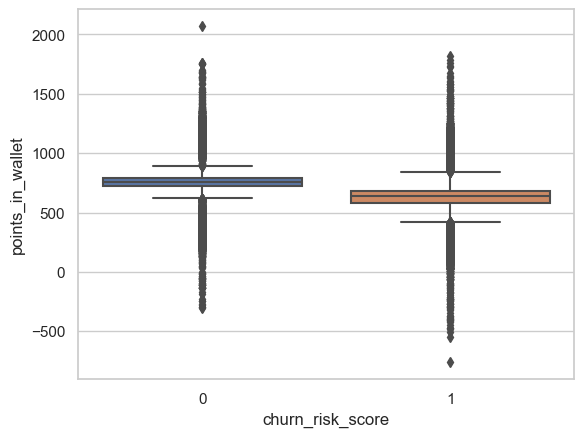

In [26]:
continuous = ['age','days_since_last_login','avg_time_spent','avg_transaction_value','points_in_wallet',]

for i in continuous:
    sns.boxplot(x = df['churn_risk_score'], y = df[i])
    plt.show()
    

In [27]:


# Assuming df is your DataFrame containing the data

df_num = df.select_dtypes(include=['float64', 'int64'])  # Select only numerical columns

Q1 = df_num.quantile(0.25)
Q3 = df_num.quantile(0.75)
IQR = Q3 - Q1

outlier = pd.DataFrame((df_num < (Q1 - 1.5 * IQR)) | (df_num > (Q3 + 1.5 * IQR)))

for i in outlier.columns:
    print(f'Total number of outliers in column {i} are {len(outlier[outlier[i] == True][i])}')


Total number of outliers in column age are 0
Total number of outliers in column days_since_last_login are 1999
Total number of outliers in column avg_time_spent are 4677
Total number of outliers in column avg_transaction_value are 1131
Total number of outliers in column points_in_wallet are 4367
Total number of outliers in column churn_risk_score are 0


In [28]:
df_iqr = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)] 

df_iqr.reset_index(inplace=True)

df_iqr.drop('index',axis=1, inplace=True)

In [29]:
df_iqr.describe()


,age,days_since_last_login,avg_time_spent,avg_transaction_value,points_in_wallet,churn_risk_score
count,26156.000000,26156.000000,26156.000000,26156.000000,23387.000000,26156.00000
mean,37.131786,12.897729,206.305057,27302.703720,685.411329,0.55559
std,15.852762,5.563898,180.817559,16379.984124,93.651568,0.49691
min,10.000000,1.000000,-384.009123,804.340000,394.678839,0.00000
25%,23.000000,9.000000,63.477500,13698.797500,625.330000,0.00000
50%,37.000000,13.000000,151.210000,26636.420000,694.520000,1.00000
75%,51.000000,17.000000,300.750000,39502.070000,752.200000,1.00000
max,64.000000,26.000000,800.960000,80823.090000,985.144483,1.00000


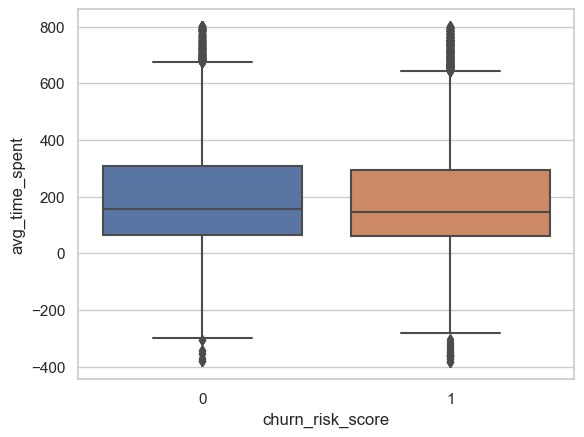

In [30]:
 sns.boxplot(x = df_iqr['churn_risk_score'], y = df_iqr['avg_time_spent'])
plt.show()

In [31]:
df_iqr['avg_time_spent']=df_iqr['avg_time_spent'].apply(lambda x:x if x>=0 else np.nan)

In [32]:
continous_columns = ['avg_time_spent', 'points_in_wallet']
for column in continous_columns:
    df_iqr[column].fillna(df_iqr[column].mean(), inplace=True)

In [33]:
#For imputing missing values for categorical features we have used mode value
#For imputing missing values for numerical featurers we have used Mean 

In [34]:
df_iqr.describe()

,age,days_since_last_login,avg_time_spent,avg_transaction_value,points_in_wallet,churn_risk_score
count,26156.000000,26156.000000,26156.000000,26156.000000,26156.000000,26156.00000
mean,37.131786,12.897729,208.345237,27302.703720,685.411329,0.55559
std,15.852762,5.563898,178.233269,16379.984124,88.555525,0.49691
min,10.000000,1.000000,1.837399,804.340000,394.678839,0.00000
25%,23.000000,9.000000,64.820000,13698.797500,633.470000,0.00000
50%,37.000000,13.000000,153.350000,26636.420000,685.411329,1.00000
75%,51.000000,17.000000,300.750000,39502.070000,744.232500,1.00000
max,64.000000,26.000000,800.960000,80823.090000,985.144483,1.00000


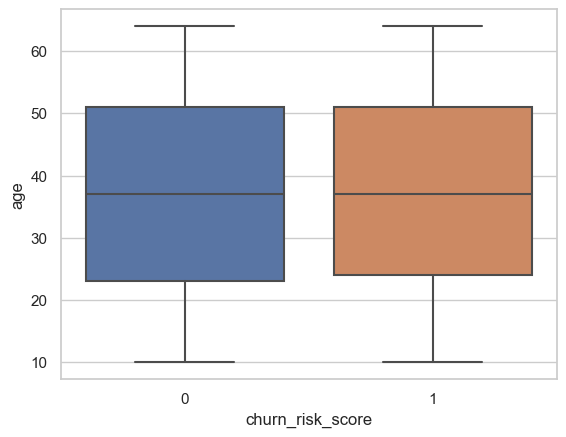

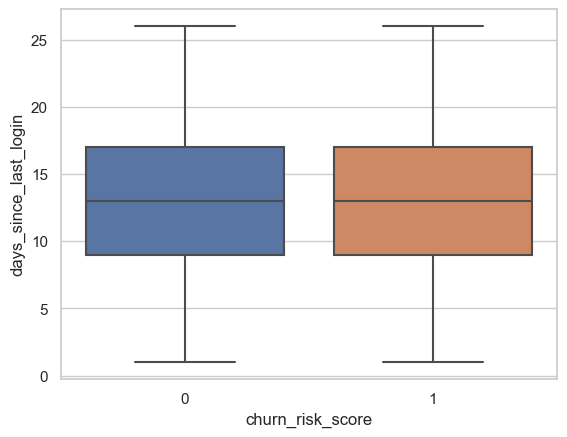

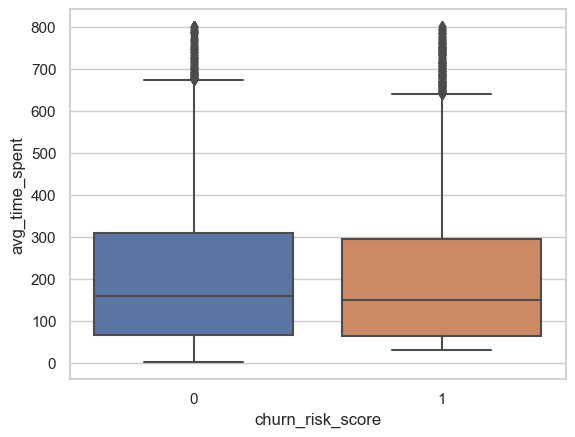

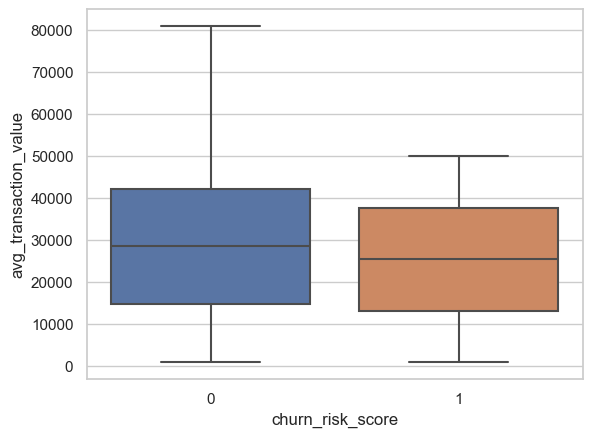

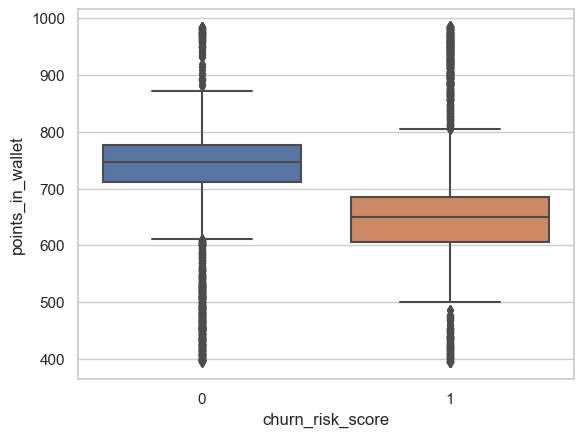

In [35]:
continuous = ['age','days_since_last_login','avg_time_spent','avg_transaction_value','points_in_wallet',]

for i in continuous:
    sns.boxplot(x = df_iqr['churn_risk_score'], y = df_iqr[i])
    plt.show()

In [36]:
df_iqr.describe()

,age,days_since_last_login,avg_time_spent,avg_transaction_value,points_in_wallet,churn_risk_score
count,26156.000000,26156.000000,26156.000000,26156.000000,26156.000000,26156.00000
mean,37.131786,12.897729,208.345237,27302.703720,685.411329,0.55559
std,15.852762,5.563898,178.233269,16379.984124,88.555525,0.49691
min,10.000000,1.000000,1.837399,804.340000,394.678839,0.00000
25%,23.000000,9.000000,64.820000,13698.797500,633.470000,0.00000
50%,37.000000,13.000000,153.350000,26636.420000,685.411329,1.00000
75%,51.000000,17.000000,300.750000,39502.070000,744.232500,1.00000
max,64.000000,26.000000,800.960000,80823.090000,985.144483,1.00000


In [37]:
df=df_iqr.copy()


In [38]:
df.describe()

,age,days_since_last_login,avg_time_spent,avg_transaction_value,points_in_wallet,churn_risk_score
count,26156.000000,26156.000000,26156.000000,26156.000000,26156.000000,26156.00000
mean,37.131786,12.897729,208.345237,27302.703720,685.411329,0.55559
std,15.852762,5.563898,178.233269,16379.984124,88.555525,0.49691
min,10.000000,1.000000,1.837399,804.340000,394.678839,0.00000
25%,23.000000,9.000000,64.820000,13698.797500,633.470000,0.00000
50%,37.000000,13.000000,153.350000,26636.420000,685.411329,1.00000
75%,51.000000,17.000000,300.750000,39502.070000,744.232500,1.00000
max,64.000000,26.000000,800.960000,80823.090000,985.144483,1.00000


In [39]:
df.select_dtypes(include=['object']).head()

,gender,region_category,membership_category,preferred_offer_types,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback
0,F,Village,Platinum Membership,Gift Vouchers/Coupons,Yes,Yes,No,Not Applicable,Products always in Stock
1,F,City,Premium Membership,Gift Vouchers/Coupons,Yes,No,Yes,Solved,Quality Customer Care
2,F,Town,No Membership,Gift Vouchers/Coupons,No,Yes,Yes,Solved in Follow-up,Poor Website
3,M,City,No Membership,Gift Vouchers/Coupons,No,Yes,Yes,Unsolved,Poor Website
4,F,City,No Membership,Credit/Debit Card Offers,No,Yes,Yes,Solved,Poor Website


In [40]:
# I'm using on-Hot encoding here

In [41]:
dummy = pd.get_dummies(df[['gender','region_category','membership_category','preferred_offer_types','used_special_discount','offer_application_preference','past_complaint','complaint_status','feedback' ]], drop_first=True)

# Adding the results to the master dataframe
df = pd.concat([df, dummy], axis=1)

In [42]:
df.head()

,age,gender,region_category,membership_category,preferred_offer_types,days_since_last_login,avg_time_spent,avg_transaction_value,points_in_wallet,used_special_discount,...,complaint_status_Solved in Follow-up,complaint_status_Unsolved,feedback_Poor Customer Service,feedback_Poor Product Quality,feedback_Poor Website,feedback_Products always in Stock,feedback_Quality Customer Care,feedback_Reasonable Price,feedback_Too many ads,feedback_User Friendly Website
0,18,F,Village,Platinum Membership,Gift Vouchers/Coupons,17,300.63,53005.25,781.750000,Yes,...,0,0,0,0,0,1,0,0,0,0
1,32,F,City,Premium Membership,Gift Vouchers/Coupons,16,306.34,12838.38,685.411329,Yes,...,0,0,0,0,0,0,1,0,0,0
2,44,F,Town,No Membership,Gift Vouchers/Coupons,14,516.16,21027.00,500.690000,No,...,1,0,0,0,1,0,0,0,0,0
3,37,M,City,No Membership,Gift Vouchers/Coupons,11,53.27,25239.56,567.660000,No,...,0,1,0,0,1,0,0,0,0,0
4,31,F,City,No Membership,Credit/Debit Card Offers,20,113.13,24483.66,663.060000,No,...,0,0,0,0,1,0,0,0,0,0


In [43]:
# To display maximum rows and columns 

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [44]:
# We have created dummies for the below variables, so we can drop them
df = df.drop(['gender','region_category','membership_category','preferred_offer_types','used_special_discount','offer_application_preference','past_complaint','complaint_status','feedback'], 1)

In [45]:
df.head()

,age,days_since_last_login,avg_time_spent,avg_transaction_value,points_in_wallet,churn_risk_score,gender_M,region_category_Town,region_category_Village,membership_category_Gold Membership,membership_category_No Membership,membership_category_Platinum Membership,membership_category_Premium Membership,membership_category_Silver Membership,preferred_offer_types_Gift Vouchers/Coupons,preferred_offer_types_Without Offers,used_special_discount_Yes,offer_application_preference_Yes,past_complaint_Yes,complaint_status_Not Applicable,complaint_status_Solved,complaint_status_Solved in Follow-up,complaint_status_Unsolved,feedback_Poor Customer Service,feedback_Poor Product Quality,feedback_Poor Website,feedback_Products always in Stock,feedback_Quality Customer Care,feedback_Reasonable Price,feedback_Too many ads,feedback_User Friendly Website
0,18,17,300.63,53005.25,781.750000,0,0,0,1,0,0,1,0,0,1,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0
1,32,16,306.34,12838.38,685.411329,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0
2,44,14,516.16,21027.00,500.690000,1,0,1,0,0,1,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0,0,0,0
3,37,11,53.27,25239.56,567.660000,1,1,0,0,0,1,0,0,0,1,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0
4,31,20,113.13,24483.66,663.060000,1,0,0,0,0,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,1,0,0,0,0,0


In [46]:
from sklearn.model_selection import train_test_split

In [47]:
# Putting feature variable to X
X = df.drop(['churn_risk_score'], axis=1)

X.head()

,age,days_since_last_login,avg_time_spent,avg_transaction_value,points_in_wallet,gender_M,region_category_Town,region_category_Village,membership_category_Gold Membership,membership_category_No Membership,membership_category_Platinum Membership,membership_category_Premium Membership,membership_category_Silver Membership,preferred_offer_types_Gift Vouchers/Coupons,preferred_offer_types_Without Offers,used_special_discount_Yes,offer_application_preference_Yes,past_complaint_Yes,complaint_status_Not Applicable,complaint_status_Solved,complaint_status_Solved in Follow-up,complaint_status_Unsolved,feedback_Poor Customer Service,feedback_Poor Product Quality,feedback_Poor Website,feedback_Products always in Stock,feedback_Quality Customer Care,feedback_Reasonable Price,feedback_Too many ads,feedback_User Friendly Website
0,18,17,300.63,53005.25,781.750000,0,0,1,0,0,1,0,0,1,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0
1,32,16,306.34,12838.38,685.411329,0,0,0,0,0,0,1,0,1,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0
2,44,14,516.16,21027.00,500.690000,0,1,0,0,1,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0,0,0,0
3,37,11,53.27,25239.56,567.660000,1,0,0,0,1,0,0,0,1,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0
4,31,20,113.13,24483.66,663.060000,0,0,0,0,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,1,0,0,0,0,0


In [48]:
# Putting response variable to y
y = df['churn_risk_score']

y.head()

0    0
1    0
2    1
3    1
4    1
Name: churn_risk_score, dtype: int64

In [49]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [50]:
# To check the shape
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((18309, 30), (7847, 30), (18309,), (7847,))

In [51]:
from sklearn.preprocessing import MinMaxScaler

In [52]:
scaler = MinMaxScaler()

X_train[['age','days_since_last_login','avg_time_spent','avg_transaction_value','points_in_wallet']] = scaler.fit_transform(X_train[['age','days_since_last_login','avg_time_spent','avg_transaction_value','points_in_wallet']])

X_train.head()

,age,days_since_last_login,avg_time_spent,avg_transaction_value,points_in_wallet,gender_M,region_category_Town,region_category_Village,membership_category_Gold Membership,membership_category_No Membership,membership_category_Platinum Membership,membership_category_Premium Membership,membership_category_Silver Membership,preferred_offer_types_Gift Vouchers/Coupons,preferred_offer_types_Without Offers,used_special_discount_Yes,offer_application_preference_Yes,past_complaint_Yes,complaint_status_Not Applicable,complaint_status_Solved,complaint_status_Solved in Follow-up,complaint_status_Unsolved,feedback_Poor Customer Service,feedback_Poor Product Quality,feedback_Poor Website,feedback_Products always in Stock,feedback_Quality Customer Care,feedback_Reasonable Price,feedback_Too many ads,feedback_User Friendly Website
18931,0.537037,0.64,0.208117,0.124075,0.645967,1,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,1,0,1,0,0,0,0,0,0
21032,0.666667,0.24,0.235995,0.434864,0.492378,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0
13611,0.111111,0.00,0.749412,0.069163,0.428443,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0
2480,0.222222,0.08,0.142960,0.032759,0.304965,1,1,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0
10512,0.870370,0.72,0.168447,0.061432,0.472426,1,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0


In [53]:
X_test.head()

,age,days_since_last_login,avg_time_spent,avg_transaction_value,points_in_wallet,gender_M,region_category_Town,region_category_Village,membership_category_Gold Membership,membership_category_No Membership,membership_category_Platinum Membership,membership_category_Premium Membership,membership_category_Silver Membership,preferred_offer_types_Gift Vouchers/Coupons,preferred_offer_types_Without Offers,used_special_discount_Yes,offer_application_preference_Yes,past_complaint_Yes,complaint_status_Not Applicable,complaint_status_Solved,complaint_status_Solved in Follow-up,complaint_status_Unsolved,feedback_Poor Customer Service,feedback_Poor Product Quality,feedback_Poor Website,feedback_Products always in Stock,feedback_Quality Customer Care,feedback_Reasonable Price,feedback_Too many ads,feedback_User Friendly Website
226,33,20,260.92,70639.99,760.540000,1,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1
17308,59,24,125.18,19507.15,494.145657,1,1,0,0,0,0,1,0,0,0,0,1,1,0,1,0,0,0,0,1,0,0,0,0,0
20747,56,5,798.01,2353.79,647.280000,0,1,0,0,0,0,0,0,1,0,1,1,0,1,0,0,0,0,1,0,0,0,0,0,0
25890,58,23,160.39,46036.31,683.480000,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,1,0,0,0,0,0,0,0
5993,48,8,57.99,26382.01,581.470000,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0


In [54]:
#scaler = MinMaxScaler()

X_test[['age','days_since_last_login','avg_time_spent','avg_transaction_value','points_in_wallet']] = scaler.fit_transform(X_test[['age','days_since_last_login','avg_time_spent','avg_transaction_value','points_in_wallet']])

X_test.head()

,age,days_since_last_login,avg_time_spent,avg_transaction_value,points_in_wallet,gender_M,region_category_Town,region_category_Village,membership_category_Gold Membership,membership_category_No Membership,membership_category_Platinum Membership,membership_category_Premium Membership,membership_category_Silver Membership,preferred_offer_types_Gift Vouchers/Coupons,preferred_offer_types_Without Offers,used_special_discount_Yes,offer_application_preference_Yes,past_complaint_Yes,complaint_status_Not Applicable,complaint_status_Solved,complaint_status_Solved in Follow-up,complaint_status_Unsolved,feedback_Poor Customer Service,feedback_Poor Product Quality,feedback_Poor Website,feedback_Products always in Stock,feedback_Quality Customer Care,feedback_Reasonable Price,feedback_Too many ads,feedback_User Friendly Website
226,0.425926,0.76,0.299670,0.873278,0.619678,1,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1
17308,0.907407,0.92,0.123641,0.233874,0.168319,1,1,0,0,0,0,1,0,0,0,0,1,1,0,1,0,0,0,0,1,0,0,0,0,0
20747,0.851852,0.16,0.996174,0.019375,0.427779,0,1,0,0,0,0,0,0,1,0,1,1,0,1,0,0,0,0,1,0,0,0,0,0,0
25890,0.888889,0.88,0.169302,0.565615,0.489113,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,1,0,0,0,0,0,0,0
5993,0.703704,0.28,0.036508,0.319842,0.316275,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0


In [55]:
from sklearn.linear_model import LogisticRegression

In [56]:
lr = LogisticRegression()

In [57]:
# Training data is used for model building
lr.fit(X_train, y_train)

LogisticRegression()

In [58]:
# Testing data is used for prediction
y_pred_logreg = lr.predict(X_test)

In [59]:
y_pred_logreg

array([0, 0, 1, ..., 0, 0, 1], dtype=int64)

In [60]:
y_test

226      0
17308    0
20747    1
25890    1
5993     1
15985    1
22294    0
20630    0
18584    0
1245     1
6861     1
10928    0
9382     0
15837    1
1512     1
3246     1
2258     0
4604     0
13912    1
620      1
19423    1
3196     0
8468     0
9435     1
25480    1
14938    1
21347    1
2998     1
10485    0
16153    1
15614    1
9917     0
2701     0
19420    0
1197     0
12028    0
11748    0
13551    0
12267    0
76       1
17335    0
10105    1
26004    0
21042    0
24244    1
4481     0
21155    1
22523    1
10645    1
10212    1
16712    0
25069    0
22245    1
24952    1
7976     1
26001    0
16349    1
6788     0
3741     1
13510    0
962      1
23032    1
10962    1
8109     1
16177    1
20001    0
22171    0
18870    0
7805     1
15199    1
124      1
15132    1
14345    1
3053     1
12947    1
18288    1
19726    1
5051     0
15083    1
19736    1
2162     0
26119    1
14271    1
4569     1
10152    0
15015    1
4442     0
9823     1
12398    1
11596    0
9957     1

In [61]:
from sklearn.metrics import accuracy_score

In [62]:
accuracy_score(y_test, y_pred_logreg)

0.9160188607110998

In [63]:
# Libraries for Validation of models
from sklearn.metrics import confusion_matrix

In [64]:
logistic_confusion_matrix = confusion_matrix(y_test, y_pred_logreg)
logistic_confusion_matrix

array([[3228,  294],
       [ 365, 3960]], dtype=int64)

In [65]:
from sklearn.metrics import roc_curve, roc_auc_score

In [66]:
# Function For Logistic Regression Create Summary For Logistic Regression

def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', lw=2,linestyle='--')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle=':')
    plt.xlabel('False Positive Rate(1-specificity)')
    plt.ylabel('True Positive Rate (sensitivity)')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

def get_summary(y_test, y_pred_logreg):
    # Confusion Matrix
    conf_mat = confusion_matrix(y_test, y_pred_logreg)
    TP = conf_mat[0,0:1]
    FP = conf_mat[0,1:2]
    FN = conf_mat[1,0:1]
    TN = conf_mat[1,1:2]
    
    accuracy = (TP+TN)/((FN+FP)+(TP+TN))
    sensitivity = TP/(TP+FN)
    specificity = TN/(TN+FP)
    precision = TP/(TP+FP)
    recall =  TP / (TP + FN)
    fScore = (2 * recall * precision) / (recall + precision)
    auc = roc_auc_score(y_test, y_pred_logreg)

    print("Confusion Matrix:\n",conf_mat)
    print("Accuracy:",accuracy)
    print("Sensitivity :",sensitivity)
    print("Specificity :",specificity)
    print("Precision:",precision)
    print("Recall:",recall)
    print("F-score:",fScore)
    print("AUC:",auc)
    print("ROC curve:")
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_logreg)
    plot_roc_curve(fpr, tpr)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Confusion Matrix:
 [[3228  294]
 [ 365 3960]]
Accuracy: [0.91601886]
Sensitivity : [0.89841358]
Specificity : [0.93088858]
Precision: [0.9165247]
Recall: [0.89841358]
F-score: [0.90737878]
AUC: 0.9160658191450601
ROC curve:


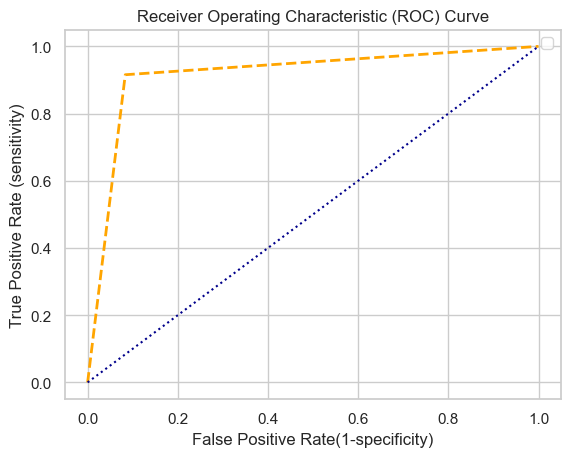

In [67]:
get_summary(y_test, y_pred_logreg)

# Support Vector Machine (SVM)

In [68]:
X_train.head()

,age,days_since_last_login,avg_time_spent,avg_transaction_value,points_in_wallet,gender_M,region_category_Town,region_category_Village,membership_category_Gold Membership,membership_category_No Membership,membership_category_Platinum Membership,membership_category_Premium Membership,membership_category_Silver Membership,preferred_offer_types_Gift Vouchers/Coupons,preferred_offer_types_Without Offers,used_special_discount_Yes,offer_application_preference_Yes,past_complaint_Yes,complaint_status_Not Applicable,complaint_status_Solved,complaint_status_Solved in Follow-up,complaint_status_Unsolved,feedback_Poor Customer Service,feedback_Poor Product Quality,feedback_Poor Website,feedback_Products always in Stock,feedback_Quality Customer Care,feedback_Reasonable Price,feedback_Too many ads,feedback_User Friendly Website
18931,0.537037,0.64,0.208117,0.124075,0.645967,1,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,1,0,1,0,0,0,0,0,0
21032,0.666667,0.24,0.235995,0.434864,0.492378,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0
13611,0.111111,0.00,0.749412,0.069163,0.428443,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0
2480,0.222222,0.08,0.142960,0.032759,0.304965,1,1,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0
10512,0.870370,0.72,0.168447,0.061432,0.472426,1,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0


In [69]:
y_train.head()

18931    0
21032    0
13611    1
2480     1
10512    1
Name: churn_risk_score, dtype: int64

In [70]:
from sklearn.svm import SVC

In [71]:
svc = SVC()

In [72]:
svc.fit(X_train, y_train)

SVC()

In [73]:
y_pred_svc = svc.predict(X_test)

In [74]:
accuracy_score(y_test, y_pred_svc)

0.9068433796355295

In [75]:
SVM_confusion_matrix = confusion_matrix(y_test, y_pred_svc)
SVM_confusion_matrix

array([[3178,  344],
       [ 387, 3938]], dtype=int64)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Confusion Matrix:
 [[3178  344]
 [ 387 3938]]
Accuracy: [0.90684338]
Sensitivity : [0.8914446]
Specificity : [0.91966371]
Precision: [0.90232822]
Recall: [0.8914446]
F-score: [0.89685339]
AUC: 0.9064242269073339
ROC curve:


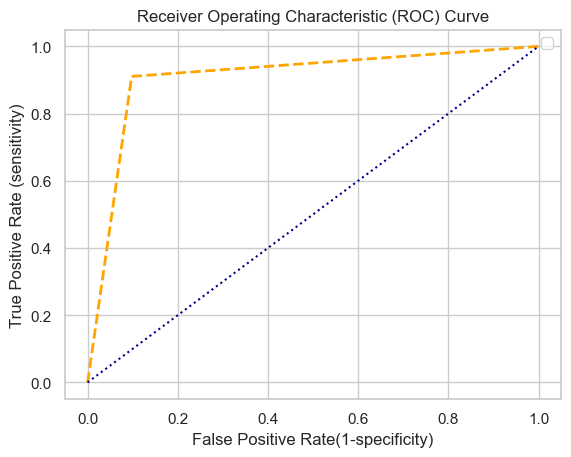

In [76]:
get_summary(y_test, y_pred_svc)

# Naive bayes Classification

In [77]:
from sklearn.naive_bayes import GaussianNB

In [78]:
gnb = GaussianNB()

In [79]:
gnb.fit(X_train, y_train)

GaussianNB()

In [80]:
y_pred_gnb = gnb.predict(X_test)

In [81]:
accuracy_score(y_test,y_pred_gnb)

0.8301261628647891

In [82]:
gnb_confusion_matrix = confusion_matrix(y_test, y_pred_gnb)
gnb_confusion_matrix

array([[2189, 1333],
       [   0, 4325]], dtype=int64)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Confusion Matrix:
 [[2189 1333]
 [   0 4325]]
Accuracy: [0.83012616]
Sensitivity : [1.]
Specificity : [0.76440438]
Precision: [0.62152186]
Recall: [1.]
F-score: [0.76659079]
AUC: 0.8107609312890403
ROC curve:


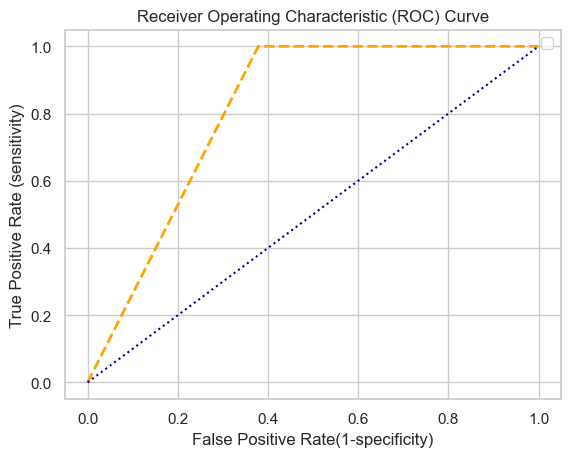

In [83]:
get_summary(y_test, y_pred_gnb)

# K - Nearest Neighbour

In [84]:
from sklearn.neighbors import KNeighborsClassifier

In [85]:
knn = KNeighborsClassifier()

In [86]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [87]:
y_pred_knn = knn.predict(X_test)

In [88]:
accuracy_score(y_test, y_pred_knn)

0.8393016439403593

In [89]:
knn_confusion_matrix = confusion_matrix(y_test, y_pred_knn)
knn_confusion_matrix

array([[2780,  742],
       [ 519, 3806]], dtype=int64)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Confusion Matrix:
 [[2780  742]
 [ 519 3806]]
Accuracy: [0.83930164]
Sensitivity : [0.8426796]
Specificity : [0.83685136]
Precision: [0.78932425]
Recall: [0.8426796]
F-score: [0.81512975]
AUC: 0.8346621237932992
ROC curve:


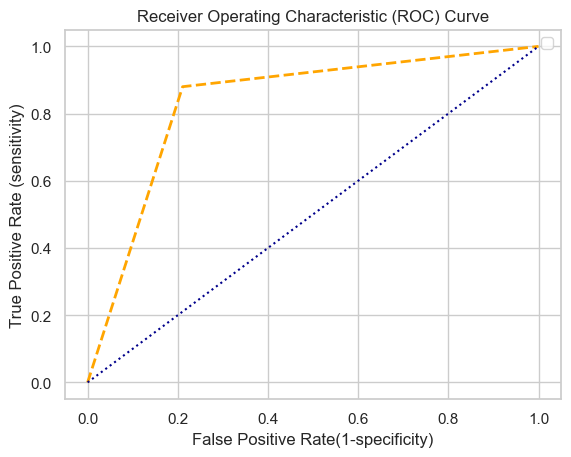

In [90]:
get_summary(y_test, y_pred_knn)

# Decision Tree

In [91]:
from sklearn.tree import DecisionTreeClassifier

In [92]:
dtree = DecisionTreeClassifier()

In [93]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

In [94]:
y_pred_dtree = dtree.predict(X_test)

In [95]:
accuracy_score(y_test, y_pred_dtree)

0.9134701159678859

In [96]:
dtree_confusion_matrix = confusion_matrix(y_test, y_pred_dtree)
dtree_confusion_matrix

array([[3210,  312],
       [ 367, 3958]], dtype=int64)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Confusion Matrix:
 [[3210  312]
 [ 367 3958]]
Accuracy: [0.91347012]
Sensitivity : [0.89740006]
Specificity : [0.92693208]
Precision: [0.91141397]
Recall: [0.89740006]
F-score: [0.90435273]
AUC: 0.9132792390030624
ROC curve:


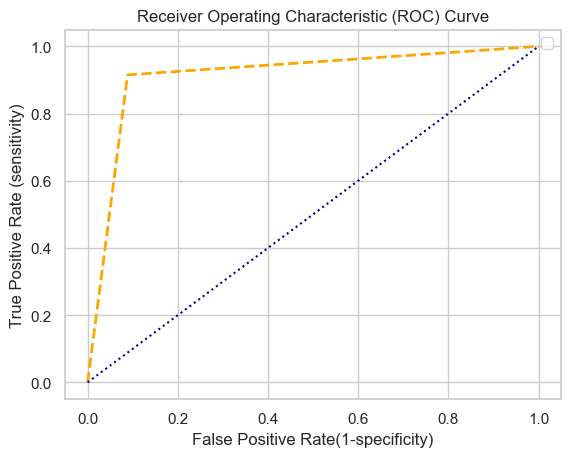

In [97]:
get_summary(y_test, y_pred_dtree)

# Random Forest

In [98]:
from sklearn.ensemble import RandomForestClassifier

In [99]:
rfc = RandomForestClassifier()

In [100]:
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [101]:
y_pred_rfc = rfc.predict(X_test)

In [102]:
accuracy_score(y_test, y_pred_rfc)

0.9342423856250797

In [103]:
RandomForest_confusion_matrix = confusion_matrix(y_test, y_pred_rfc)
RandomForest_confusion_matrix

array([[3176,  346],
       [ 170, 4155]], dtype=int64)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Confusion Matrix:
 [[3176  346]
 [ 170 4155]]
Accuracy: [0.93424239]
Sensitivity : [0.94919307]
Specificity : [0.92312819]
Precision: [0.90176036]
Recall: [0.94919307]
F-score: [0.92486896]
AUC: 0.9312270025241833
ROC curve:


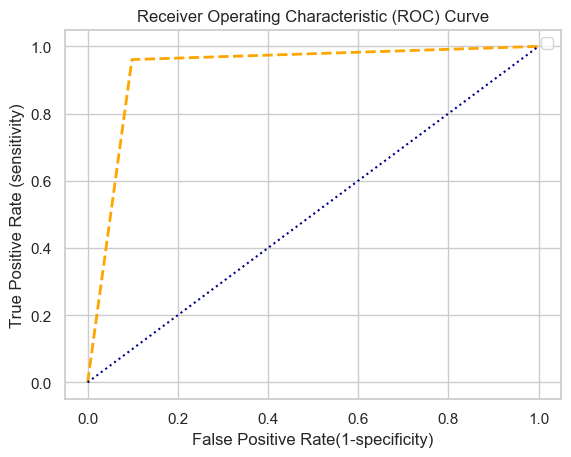

In [104]:
get_summary(y_test, y_pred_rfc)

In [105]:

import joblib

# Assuming you have the trained models in the following variables
best_lr_model = lr  # Logistic Regression model
best_svc_model = svc  # Support Vector Machine (SVM) model
best_gnb_model = gnb  # Naive Bayes model
best_knn_model = knn  # K-Nearest Neighbors (KNN) model
best_dtree_model = dtree  # Decision Tree model
best_rfc_model = rfc  # Random Forest model

# Save each model to a separate file
joblib.dump(best_lr_model, 'best_logistic_regression_model.pkl')
joblib.dump(best_svc_model, 'best_svm_model.pkl')
joblib.dump(best_gnb_model, 'best_naive_bayes_model.pkl')
joblib.dump(best_knn_model, 'best_knn_model.pkl')
joblib.dump(best_dtree_model, 'best_decision_tree_model.pkl')
joblib.dump(best_rfc_model, 'best_random_forest_model.pkl')


['best_random_forest_model.pkl']

In [106]:


from sklearn.metrics import accuracy_score


# Assuming you have the trained models for each classifier
best_lr_model = lr  # Logistic Regression model
best_svc_model = svc  # Support Vector Machine (SVM) model
best_gnb_model = gnb  # Naive Bayes model
best_knn_model = knn  # K-Nearest Neighbors (KNN) model
best_dtree_model = dtree  # Decision Tree model
best_rfc_model = rfc  # Random Forest model

# List of models and their names
models = [best_lr_model, best_svc_model, best_gnb_model, best_knn_model, best_dtree_model, best_rfc_model]
model_names = ['Logistic Regression', 'SVM', 'Naive Bayes', 'KNN', 'Decision Tree', 'Random Forest']

# Loop through each model and calculate accuracy
for model, name in zip(models, model_names):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy of {name}: {accuracy:.2f}")


Accuracy of Logistic Regression: 0.92
Accuracy of SVM: 0.91
Accuracy of Naive Bayes: 0.83
Accuracy of KNN: 0.84
Accuracy of Decision Tree: 0.91
Accuracy of Random Forest: 0.93
